#### Problem Statement :

NYC 311's mission is to provide the public with quick and easy access to all New York City government services and information while offering the best customer service. Each day, NYC311 receives thousands of requests related to several hundred types of non-emergency services, including noise complaints, plumbing issues, and illegally parked cars. These requests are received by NYC311 and forwarded to the relevant agencies such as the police, buildings, or transportation. The agency responds to the request, addresses it, and then closes it.

#### Problem Objective :

Perform a service request data analysis of New York City 311 calls. You will focus on the data wrangling techniques to understand the pattern in the data and also visualize the major complaint types.
Domain: Customer Service

#### Analysis Tasks to be performed:

Import a 311 NYC service request.

Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)

Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.

Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.
Perform a statistical test for the following:

Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

Whether the average response time across complaint types is similar or not (overall)

Are the type of complaint or service requested and location related?

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime
from datetime import date
import holidays
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import f_oneway
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import spearmanr


## Task 1

In [96]:
data = pd.read_csv('Service_request.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [97]:
data.shape

(300698, 53)

In [98]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [99]:
data.isnull().sum()[data.isnull().sum()>0]

Closed Date                         2164
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Due Date                               3
Resolution Action Updated Date      2187
X Coordinate (State Plane)          3540
Y Coordinate (State Plane)          3540
School Region                          1
School Code                            1
School Zip                             1
School or Citywide Complaint      300698
Vehicle Type                      300698
Taxi Company Borough              300698
Taxi Pick Up Loc

## Task 2

In [100]:
data['Created Date'] = data['Created Date'].astype('datetime64[ns]')
data['Closed Date'] = data['Closed Date'].astype('datetime64[ns]')

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      300698 non-null  int64         
 1   Created Date                    300698 non-null  datetime64[ns]
 2   Closed Date                     298534 non-null  datetime64[ns]
 3   Agency                          300698 non-null  object        
 4   Agency Name                     300698 non-null  object        
 5   Complaint Type                  300698 non-null  object        
 6   Descriptor                      294784 non-null  object        
 7   Location Type                   300567 non-null  object        
 8   Incident Zip                    298083 non-null  float64       
 9   Incident Address                256288 non-null  object        
 10  Street Name                     256288 non-null  object 

In [102]:
data['Request_Closing_Time'] = data['Closed Date'] - data['Created Date']
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02


In [103]:
data['Complaint Type'].value_counts()

Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64

In [104]:
Complaint_Map = {'Noise - Street/Sidewalk' : 'Noise', 'Noise - Commercial' : 'Noise', 'Noise - Vehicle': 'Noise',
                'Noise - Park': 'Noise', 'Noise - House of Worship': 'Noise', 'Agency Issues': 'Other',
                'Squeegee': 'Other', 'Ferry Complaint': 'Other', 'Animal in a Park' : 'Other',
                'Illegal Fireworks': 'Noise', 'Graffiti': 'DnD', 'Drinking': 'DnD', 'Disorderly Youth': 'DnD',
                'Urinating in Public': 'DnD', 'Bike/Roller/Skate Chronic': 'DnD', 'Blocked Driveway' : 'Blocked Driveway',
                'Illegal Parking': 'Illegal Parking', 'Derelict Vehicle': 'Derelict Vehicle', 'Animal Abuse': 'Animal Abuse',
                'Traffic' : 'Traffic', 'Homeless Encampment': 'poor', 'Panhandling': 'poor', 'Vending':'Vending',
                'Posting Advertisement': 'Posting Advertisement'}

In [105]:
data['Complaint_short'] = data['Complaint Type'].map(Complaint_Map)

## Task 3

### Univariate Analysis

In [106]:
Report_months = data.groupby(pd.Grouper(key='Created Date', freq='M')).size()
Report_months.index = Report_months.index.month
Report_months

Created Date
3      2471
4     27305
5     36437
6     35315
7     34888
8     34956
9     35427
10    32605
11    30773
12    30521
dtype: int64

<AxesSubplot:xlabel='Created Date'>

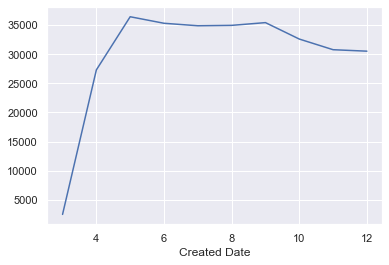

In [107]:
Report_months.plot()

We see that reports decline after the month 9.

In [108]:
week = data['Created Date'].apply(lambda x: x.weekday())
week

0         3
1         3
2         3
3         3
4         3
         ..
300693    6
300694    6
300695    6
300696    6
300697    6
Name: Created Date, Length: 300698, dtype: int64

<AxesSubplot:xlabel='Created Date', ylabel='count'>

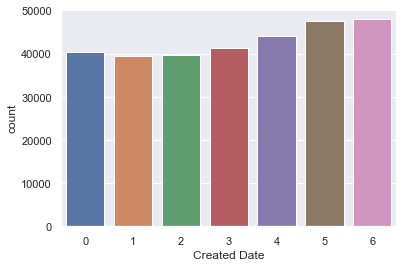

In [109]:
sns.countplot(x=week.index, data=week)

Number of reports increase on weekends.

### Bivariate Analysis

In [110]:
data['month'] = data['Created Date'].apply(lambda x: x.month)
data['hour'] = data['Created Date'].apply(lambda x: x.hour)
data['week'] = week

In [111]:
day_reports = data.groupby(['week' , 'Complaint_short']).size().unstack()
day_reports

Complaint_short,Animal Abuse,Blocked Driveway,Derelict Vehicle,DnD,Illegal Parking,Noise,Other,Posting Advertisement,Traffic,Vending,poor
week,,,,,,,,,,,
0,1196.0,11303.0,3132.0,363.0,11346.0,11281.0,2.0,93.0,517.0,515.0,741.0
1,1165.0,11287.0,2929.0,361.0,11711.0,10015.0,NaN,91.0,680.0,531.0,781.0
2,1250.0,10615.0,3032.0,357.0,11159.0,11089.0,5.0,101.0,776.0,597.0,807.0
3,1129.0,11120.0,2948.0,362.0,11385.0,12066.0,NaN,102.0,920.0,573.0,737.0
4,1102.0,10870.0,2464.0,403.0,10946.0,15947.0,2.0,84.0,798.0,683.0,696.0
5,985.0,10706.0,1607.0,417.0,8812.0,23405.0,3.0,90.0,492.0,585.0,462.0
6,951.0,11143.0,1606.0,435.0,10002.0,22610.0,1.0,89.0,315.0,318.0,499.0


In [112]:
Cols = day_reports.columns
Cols

Index(['Animal Abuse', 'Blocked Driveway', 'Derelict Vehicle', 'DnD',
       'Illegal Parking', 'Noise', 'Other', 'Posting Advertisement', 'Traffic',
       'Vending', 'poor'],
      dtype='object', name='Complaint_short')

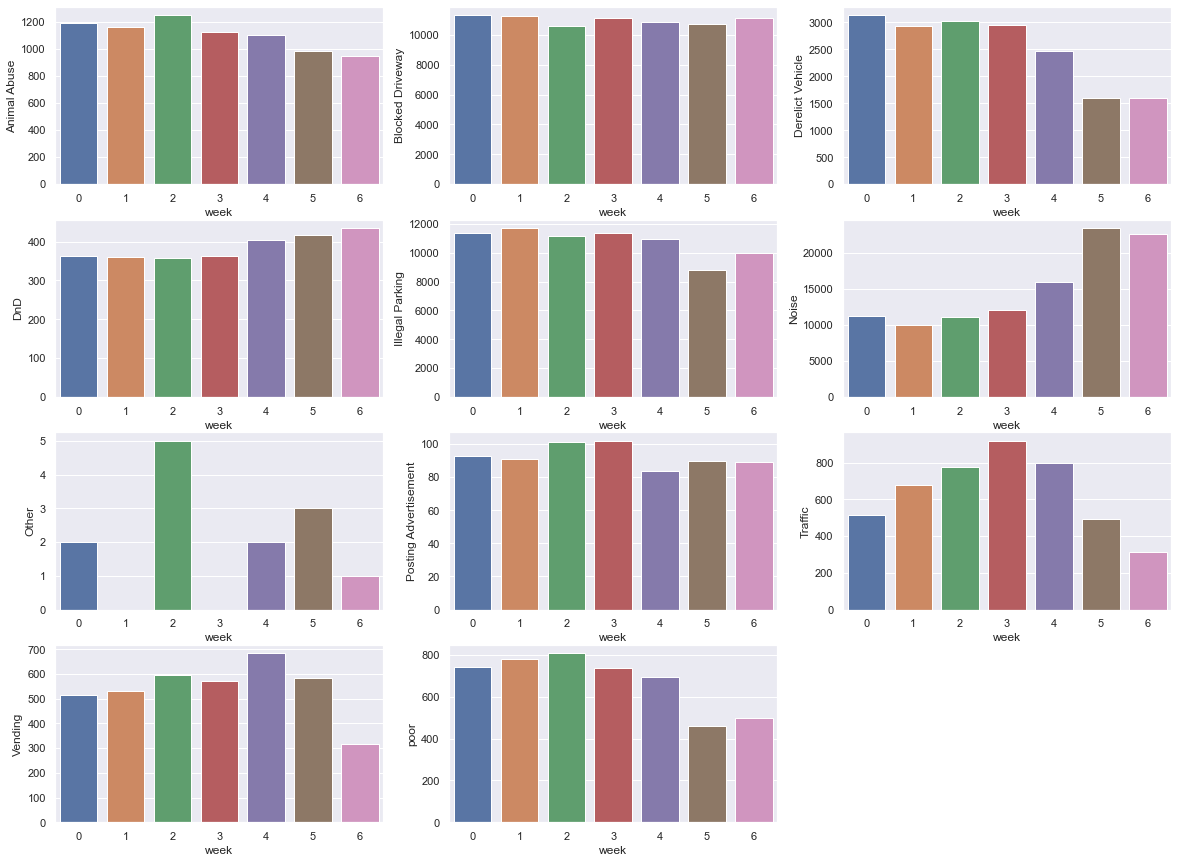

In [113]:
fig = plt.figure(figsize=(20,15))
for index,col in enumerate(Cols):
    plt.subplot(4,3,index+1)
    sns.barplot(x=day_reports.index, y=col, data=day_reports)

1) Animal Abuse, Derelict Vehicle, Illegal Parking and homeless reports are high on weekdays

2) Drunk and Disorderly and Noise reports are high on weekends

3) Vending reports are lowest on sunday

4) Traffic reports are highest on Wednesday and lowest on sunday

If you think about the above mentioned points they all make sense.

In [114]:
month_report = data.groupby(['month' , 'Complaint_short']).size().unstack()
month_report

Complaint_short,Animal Abuse,Blocked Driveway,Derelict Vehicle,DnD,Illegal Parking,Noise,Other,Posting Advertisement,Traffic,Vending,poor
month,,,,,,,,,,,
3,73.0,720.0,206.0,20.0,750.0,603.0,NaN,3.0,42.0,28.0,26.0
4,747.0,6867.0,1672.0,200.0,6918.0,9780.0,4.0,18.0,413.0,361.0,325.0
5,845.0,8103.0,1973.0,364.0,8105.0,15300.0,2.0,11.0,599.0,599.0,536.0
6,953.0,8583.0,2074.0,352.0,8604.0,13088.0,2.0,10.0,662.0,477.0,510.0
7,1043.0,7663.0,2109.0,382.0,8185.0,13786.0,4.0,20.0,521.0,516.0,659.0
8,924.0,7765.0,2019.0,403.0,8102.0,14060.0,1.0,68.0,387.0,525.0,702.0
9,881.0,8703.0,2104.0,386.0,8770.0,12923.0,NaN,89.0,489.0,405.0,677.0
10,821.0,9435.0,1871.0,229.0,8524.0,10271.0,NaN,121.0,543.0,288.0,502.0
11,702.0,9664.0,1795.0,194.0,8611.0,8544.0,NaN,153.0,431.0,276.0,403.0


In [115]:
Cols = month_report.columns
Cols

Index(['Animal Abuse', 'Blocked Driveway', 'Derelict Vehicle', 'DnD',
       'Illegal Parking', 'Noise', 'Other', 'Posting Advertisement', 'Traffic',
       'Vending', 'poor'],
      dtype='object', name='Complaint_short')

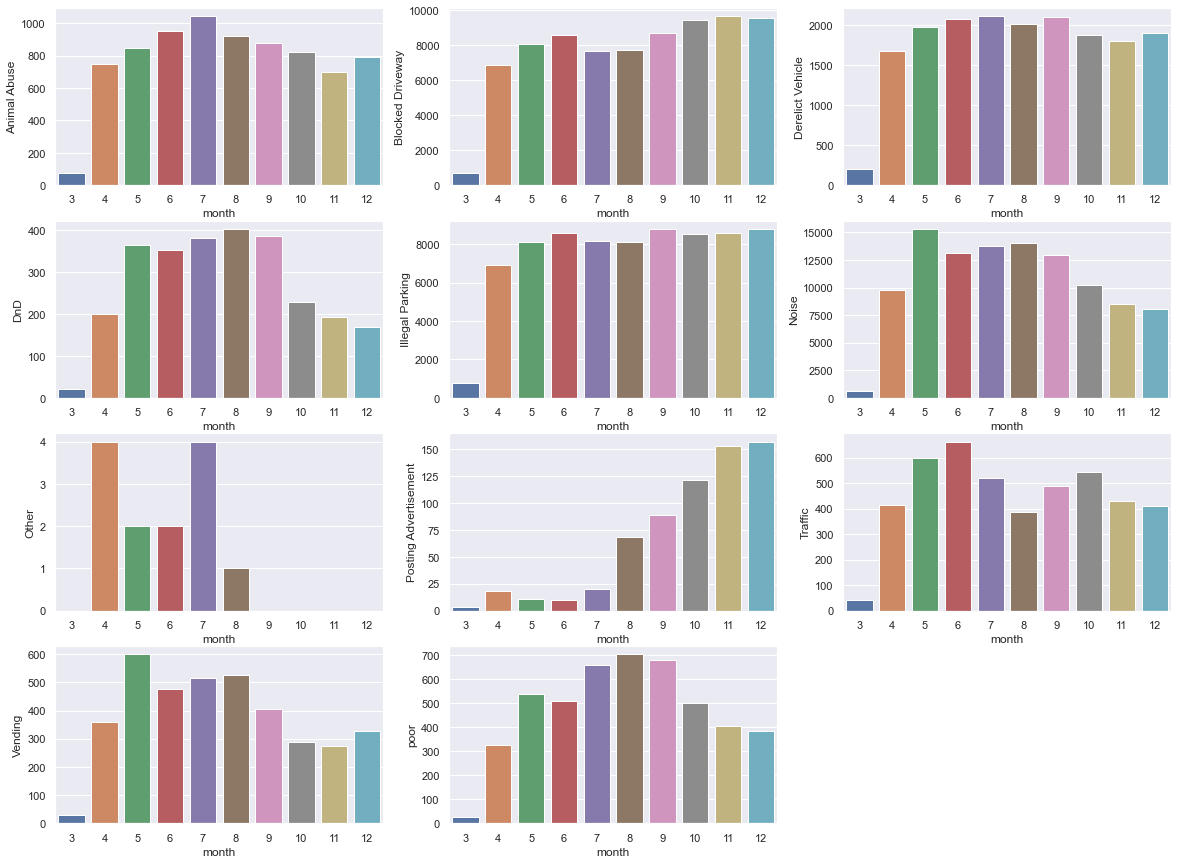

In [116]:
fig = plt.figure(figsize=(20,15))
for index,col in enumerate(Cols):
    plt.subplot(4,3,index+1)
    sns.barplot(x=month_report.index, y=col, data=month_report)

1) Animal Abuse has a spike in june, july and august. 

2) Blocked Driveway Reports increase in October, November and December. Reason might be that people visit their friends and 
families in holiday seasons and visitors may park their car's in wrong spots.

3) Drunk and Disorderly, Vending and Noise reports have a steep decline in last 3 months. College stundents return to their families, this can explain the reduction in such behaviour.

4) Posting Advertisement reports are majorly from last 4 months. People tend to buy more stuff in holiday season hence store's may want to advertise more.

5) Traffic reports see a spike in may,june and july. I think it is because of Heavy Rainfall in these months and traffic useally slows down when it rains.

In [117]:
hour_report = data.groupby(['hour' , 'Complaint_short']).size().unstack()
hour_report

Complaint_short,Animal Abuse,Blocked Driveway,Derelict Vehicle,DnD,Illegal Parking,Noise,Other,Posting Advertisement,Traffic,Vending,poor
hour,,,,,,,,,,,
0,137.0,2584.0,171.0,103.0,2358.0,11505.0,NaN,10.0,36.0,8.0,77.0
1,92.0,1774.0,132.0,64.0,1472.0,8386.0,NaN,3.0,15.0,8.0,47.0
2,78.0,1170.0,63.0,40.0,984.0,5059.0,NaN,NaN,4.0,9.0,31.0
3,44.0,881.0,35.0,30.0,707.0,2981.0,NaN,NaN,3.0,3.0,24.0
4,46.0,818.0,41.0,25.0,657.0,2036.0,NaN,NaN,8.0,2.0,28.0
5,41.0,1281.0,91.0,24.0,1012.0,1144.0,NaN,2.0,14.0,9.0,39.0
6,93.0,2385.0,280.0,24.0,1889.0,1007.0,1.0,12.0,79.0,24.0,131.0
7,170.0,3856.0,639.0,39.0,3381.0,989.0,NaN,10.0,269.0,57.0,235.0
8,277.0,4794.0,1133.0,77.0,4397.0,1106.0,2.0,5.0,360.0,137.0,403.0


In [118]:
Cols = hour_report.columns
Cols

Index(['Animal Abuse', 'Blocked Driveway', 'Derelict Vehicle', 'DnD',
       'Illegal Parking', 'Noise', 'Other', 'Posting Advertisement', 'Traffic',
       'Vending', 'poor'],
      dtype='object', name='Complaint_short')

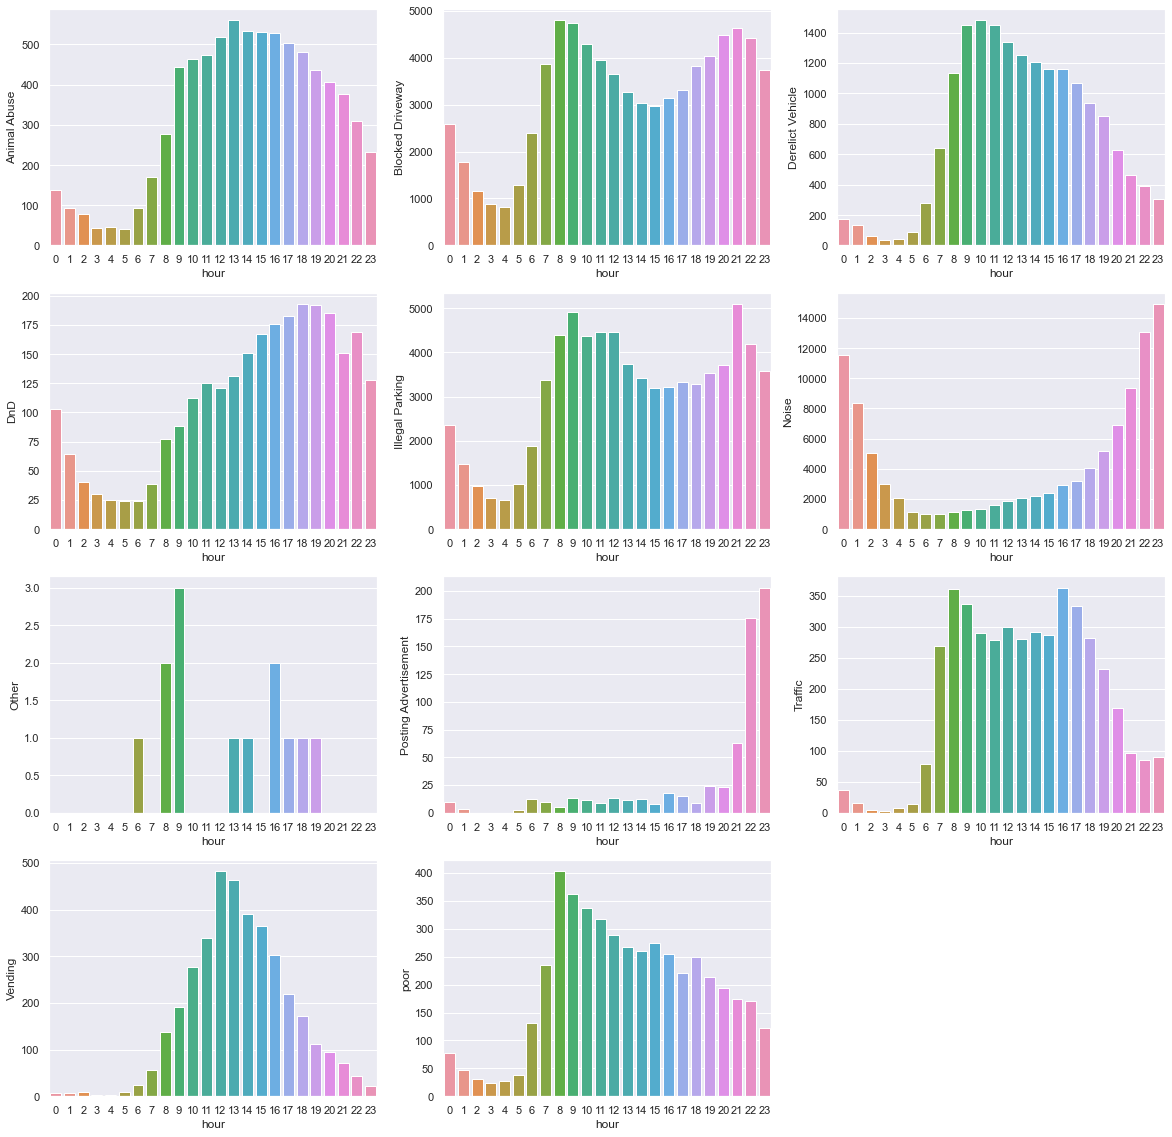

In [119]:
fig = plt.figure(figsize=(20,20))
for index,col in enumerate(Cols):
    plt.subplot(4,3,index+1)
    sns.barplot(x=hour_report.index, y=col, data=hour_report)

1) Blocked Driveway and Illegal Parking Complains are highest between 7-9am and 8-10pm.

2) Drunk and Disorderly Reports hit their peak at 6pm.

3) Noise complains are highest between 7pm and 3am. 

4) Posting Advertisement Reports are mostly between 11-12 pm. 

5) Traffic reports peak on and around 9am-5pm. This is because of the office-goers.

6) Vending reports follows a normal distribution, where it peaks at 11-12am.

In [120]:
us_holidays = holidays.UnitedStates(state='NY')

In [121]:
no_of_holidays = 0
for ptr in holidays.UnitedStates(state='NY', years = 2015).items():
    print(ptr)
    no_of_holidays +=1

(datetime.date(2015, 1, 1), "New Year's Day")
(datetime.date(2015, 1, 19), 'Martin Luther King Jr. Day')
(datetime.date(2015, 2, 12), "Lincoln's Birthday")
(datetime.date(2015, 2, 15), 'Susan B. Anthony Day')
(datetime.date(2015, 2, 16), "Washington's Birthday")
(datetime.date(2015, 5, 25), 'Memorial Day')
(datetime.date(2015, 7, 4), 'Independence Day')
(datetime.date(2015, 7, 3), 'Independence Day (Observed)')
(datetime.date(2015, 9, 7), 'Labor Day')
(datetime.date(2015, 10, 12), 'Columbus Day')
(datetime.date(2015, 11, 3), 'Election Day')
(datetime.date(2015, 11, 11), 'Veterans Day')
(datetime.date(2015, 11, 26), 'Thanksgiving')
(datetime.date(2015, 12, 25), 'Christmas Day')


In [122]:
reports_in_holidays = data['Created Date'].apply(lambda x: x in us_holidays).sum()
total_reports = len(data)
total_no_of_days = (data['Created Date'][0] - data['Created Date'].iloc[-1]).days

In [123]:
round(reports_in_holidays/no_of_holidays)

693

In [124]:
round((total_reports - reports_in_holidays) / (total_no_of_days - no_of_holidays))

1106

I was curious to see how many complaints were reported on holidays. I conclude that number of reports on holidays are far less as compared to normal days.

In [125]:
location = data.groupby(['Complaint_short', 'Location Type']).size().unstack()
location

Location Type,Bridge,Club/Bar/Restaurant,Commercial,Ferry,Highway,House and Store,House of Worship,Park,Park/Playground,Parking Lot,Residential Building,Residential Building/House,Roadway Tunnel,Store/Commercial,Street/Sidewalk,Subway Station,Terminal,Vacant Lot
Complaint_short,,,,,,,,,,,,,,,,,,
Animal Abuse,NaN,NaN,62.0,NaN,NaN,93.0,NaN,NaN,123.0,110.0,227.0,5085.0,NaN,522.0,1531.0,22.0,NaN,NaN
Blocked Driveway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77007.0,NaN,NaN,NaN
Derelict Vehicle,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,17614.0,NaN,NaN,77.0
DnD,NaN,387.0,NaN,NaN,NaN,NaN,NaN,NaN,136.0,NaN,NaN,588.0,NaN,249.0,1324.0,12.0,NaN,NaN
Illegal Parking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75326.0,NaN,NaN,NaN
Noise,NaN,16973.0,NaN,NaN,NaN,NaN,929.0,NaN,4049.0,NaN,NaN,33.0,NaN,18600.0,65806.0,NaN,NaN,NaN
Other,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,NaN
Posting Advertisement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,54.0,NaN,6.0,582.0,NaN,NaN,NaN
Traffic,NaN,NaN,NaN,NaN,186.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,4278.0,NaN,NaN,NaN


In [126]:
data['Location Type'].value_counts()

Street/Sidewalk               249299
Store/Commercial               20381
Club/Bar/Restaurant            17360
Residential Building/House      6960
Park/Playground                 4773
House of Worship                 929
Residential Building             227
Highway                          215
Parking Lot                      117
House and Store                   93
Vacant Lot                        77
Commercial                        62
Roadway Tunnel                    35
Subway Station                    34
Bridge                             2
Park                               1
Terminal                           1
Ferry                              1
Name: Location Type, dtype: int64

In [127]:
Cols = location.columns
Cols

Index(['Bridge', 'Club/Bar/Restaurant', 'Commercial', 'Ferry', 'Highway',
       'House and Store', 'House of Worship', 'Park', 'Park/Playground',
       'Parking Lot', 'Residential Building', 'Residential Building/House',
       'Roadway Tunnel', 'Store/Commercial', 'Street/Sidewalk',
       'Subway Station', 'Terminal', 'Vacant Lot'],
      dtype='object', name='Location Type')

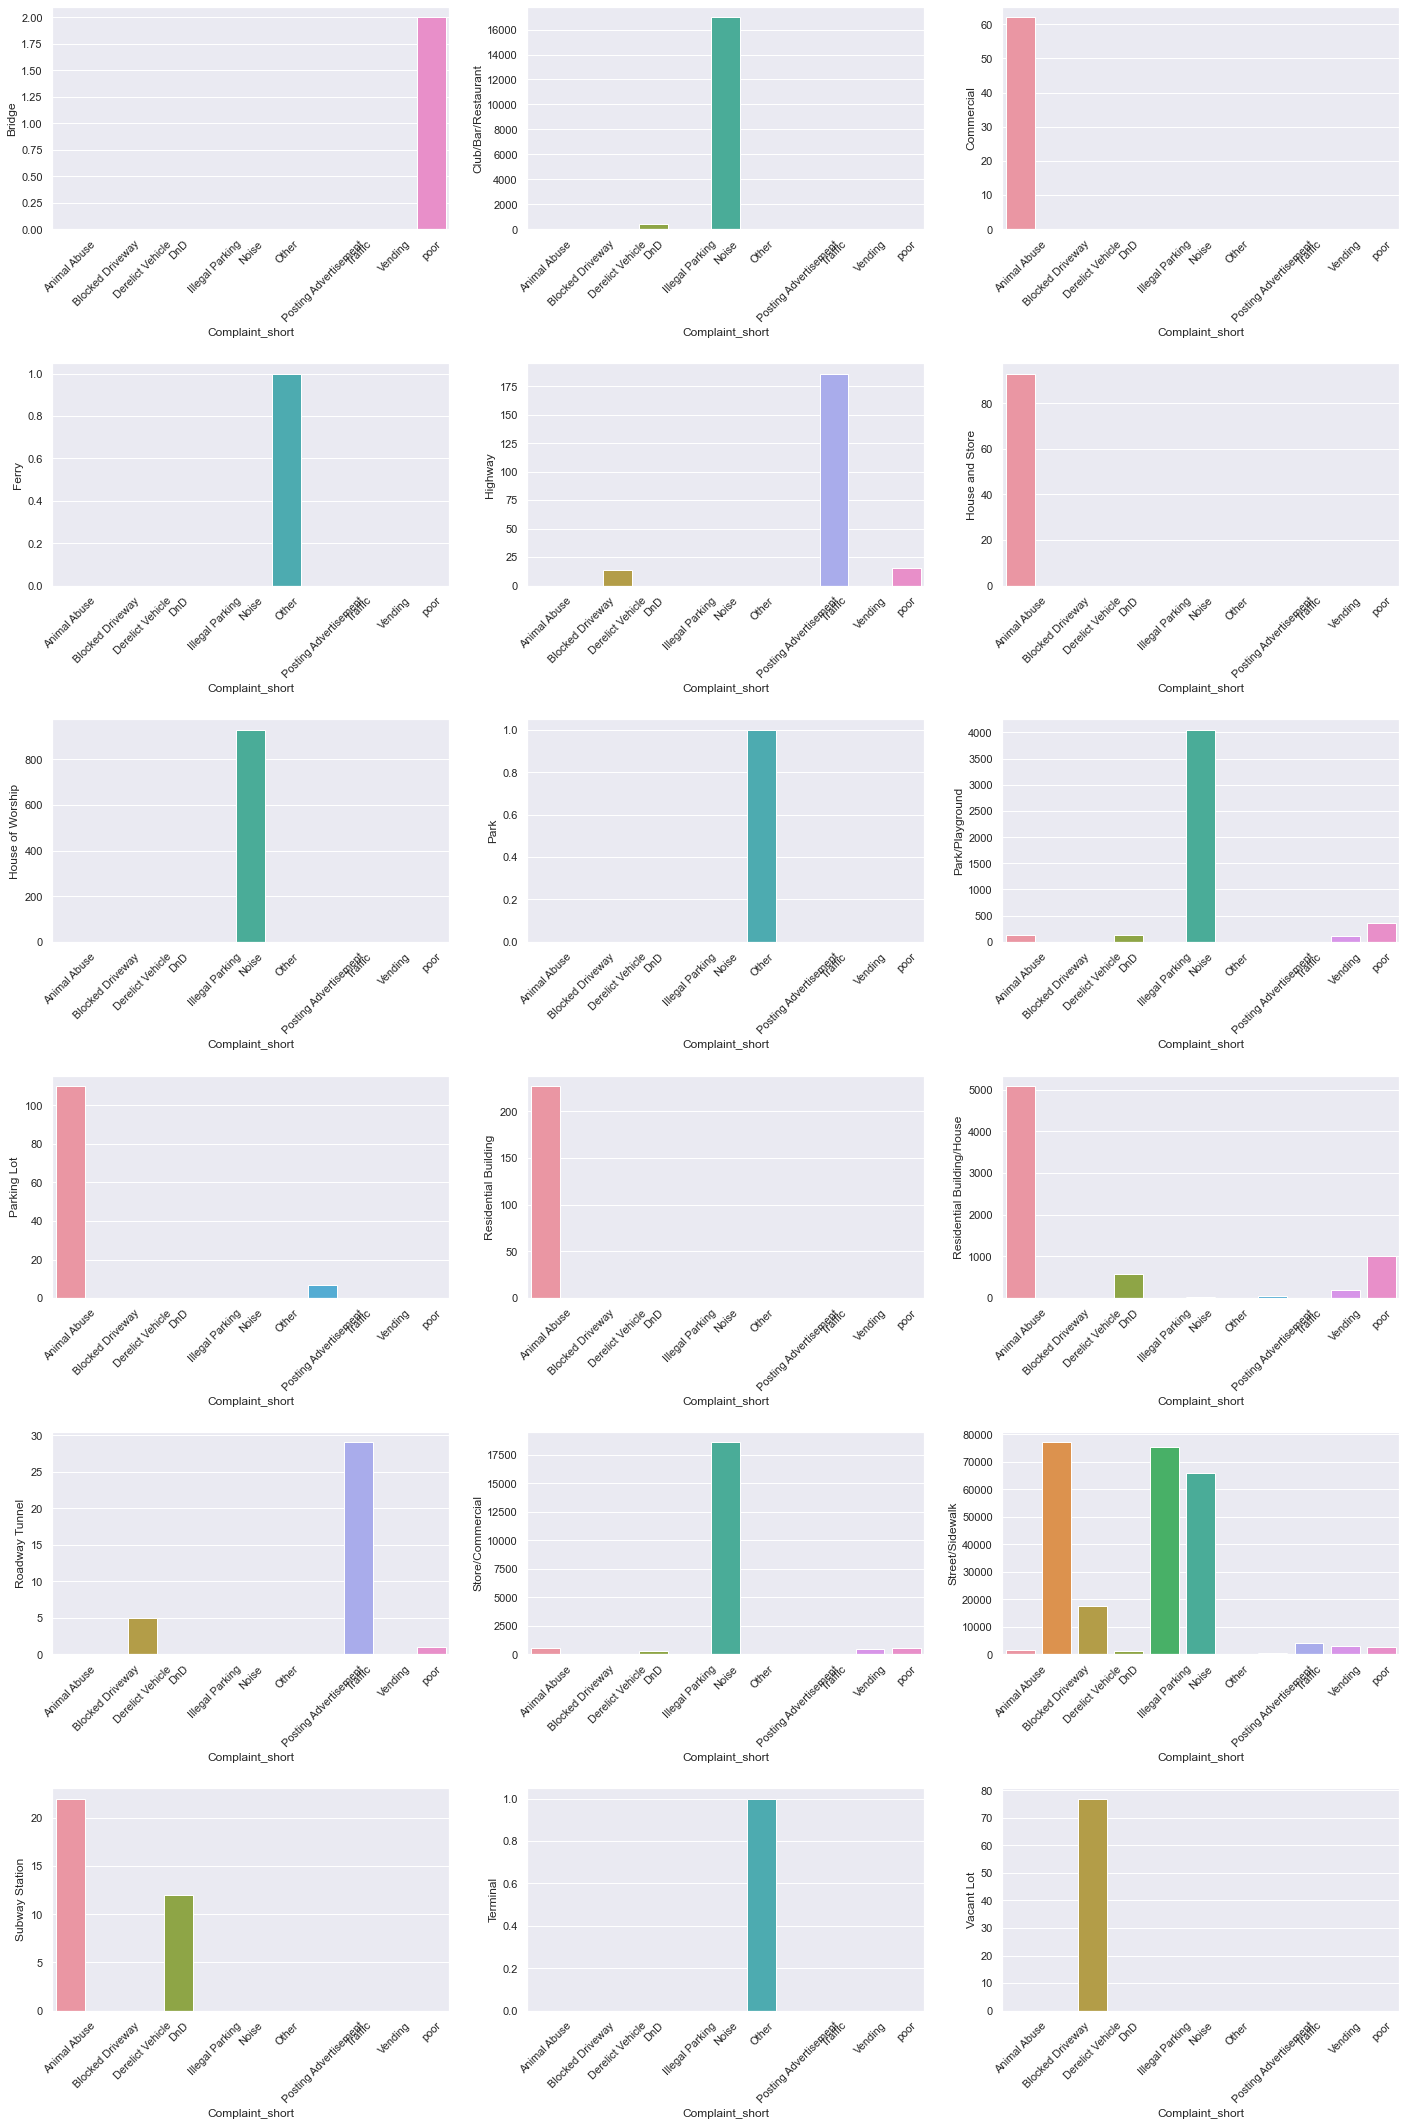

In [128]:
fig = plt.figure(figsize=(20,30))
for index,col in enumerate(Cols):
    plt.subplot(6,3,index+1)
    sns.barplot(x=location.index, y=col, data=location)
    plt.xticks(rotation=45)
fig.tight_layout(pad=2.0)   


As we can see the report types are very specific to the location type feature. 
Only Location type with different types of report in huge quatities is Street/Sidewalk.

In [129]:
data.groupby(['Complaint_short', 'City']).size().unstack()

City,ARVERNE,ASTORIA,Astoria,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,...,SAINT ALBANS,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,WHITESTONE,WOODHAVEN,WOODSIDE,Woodside
Complaint_short,,,,,,,,,,,,,,,,,,,,,
Animal Abuse,38.0,125.0,NaN,37.0,7.0,2.0,1415.0,2394.0,11.0,NaN,...,30.0,55.0,26.0,24.0,557.0,35.0,28.0,45.0,69.0,NaN
Blocked Driveway,35.0,2618.0,116.0,377.0,95.0,3.0,12755.0,28148.0,147.0,NaN,...,244.0,942.0,1548.0,262.0,2142.0,206.0,208.0,1060.0,1613.0,11.0
Derelict Vehicle,27.0,351.0,12.0,198.0,89.0,3.0,1953.0,5181.0,115.0,NaN,...,202.0,358.0,289.0,210.0,1766.0,10.0,227.0,308.0,247.0,2.0
DnD,5.0,66.0,NaN,5.0,5.0,1.0,331.0,619.0,NaN,NaN,...,5.0,18.0,26.0,9.0,221.0,17.0,8.0,7.0,31.0,NaN
Illegal Parking,58.0,1068.0,213.0,514.0,106.0,15.0,7859.0,27462.0,76.0,2.0,...,181.0,494.0,462.0,238.0,4886.0,122.0,525.0,682.0,891.0,100.0
Noise,51.0,1967.0,376.0,77.0,63.0,6.0,15372.0,31952.0,117.0,95.0,...,151.0,268.0,377.0,119.0,1947.0,289.0,84.0,341.0,606.0,7.0
Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Posting Advertisement,NaN,1.0,NaN,NaN,1.0,NaN,17.0,45.0,NaN,NaN,...,NaN,1.0,NaN,2.0,516.0,2.0,NaN,NaN,NaN,NaN
Traffic,NaN,47.0,NaN,9.0,7.0,NaN,355.0,1085.0,6.0,NaN,...,11.0,28.0,11.0,11.0,200.0,16.0,17.0,6.0,39.0,NaN


In [130]:
City = data.groupby(['Complaint_short', 'City']).size().unstack()
City

City,ARVERNE,ASTORIA,Astoria,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,...,SAINT ALBANS,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,WHITESTONE,WOODHAVEN,WOODSIDE,Woodside
Complaint_short,,,,,,,,,,,,,,,,,,,,,
Animal Abuse,38.0,125.0,NaN,37.0,7.0,2.0,1415.0,2394.0,11.0,NaN,...,30.0,55.0,26.0,24.0,557.0,35.0,28.0,45.0,69.0,NaN
Blocked Driveway,35.0,2618.0,116.0,377.0,95.0,3.0,12755.0,28148.0,147.0,NaN,...,244.0,942.0,1548.0,262.0,2142.0,206.0,208.0,1060.0,1613.0,11.0
Derelict Vehicle,27.0,351.0,12.0,198.0,89.0,3.0,1953.0,5181.0,115.0,NaN,...,202.0,358.0,289.0,210.0,1766.0,10.0,227.0,308.0,247.0,2.0
DnD,5.0,66.0,NaN,5.0,5.0,1.0,331.0,619.0,NaN,NaN,...,5.0,18.0,26.0,9.0,221.0,17.0,8.0,7.0,31.0,NaN
Illegal Parking,58.0,1068.0,213.0,514.0,106.0,15.0,7859.0,27462.0,76.0,2.0,...,181.0,494.0,462.0,238.0,4886.0,122.0,525.0,682.0,891.0,100.0
Noise,51.0,1967.0,376.0,77.0,63.0,6.0,15372.0,31952.0,117.0,95.0,...,151.0,268.0,377.0,119.0,1947.0,289.0,84.0,341.0,606.0,7.0
Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Posting Advertisement,NaN,1.0,NaN,NaN,1.0,NaN,17.0,45.0,NaN,NaN,...,NaN,1.0,NaN,2.0,516.0,2.0,NaN,NaN,NaN,NaN
Traffic,NaN,47.0,NaN,9.0,7.0,NaN,355.0,1085.0,6.0,NaN,...,11.0,28.0,11.0,11.0,200.0,16.0,17.0,6.0,39.0,NaN


In [131]:
Total_report_city = pd.Series(name='Total', data=City.sum(axis=0))
Total_report_city

City
ARVERNE                  220.0
ASTORIA                 6330.0
Astoria                  717.0
BAYSIDE                 1221.0
BELLEROSE                375.0
BREEZY POINT              30.0
BRONX                  40702.0
BROOKLYN               98307.0
CAMBRIA HEIGHTS          477.0
CENTRAL PARK              97.0
COLLEGE POINT           1220.0
CORONA                  4295.0
EAST ELMHURST           2734.0
ELMHURST                2673.0
East Elmhurst             14.0
FAR ROCKAWAY            1179.0
FLORAL PARK              152.0
FLUSHING                5971.0
FOREST HILLS            1688.0
FRESH MEADOWS           1899.0
GLEN OAKS                306.0
HOLLIS                  1012.0
HOWARD BEACH             931.0
Howard Beach               1.0
JACKSON HEIGHTS         1689.0
JAMAICA                 7296.0
KEW GARDENS              771.0
LITTLE NECK              559.0
LONG ISLAND CITY        2437.0
Long Island City         134.0
MASPETH                 2462.0
MIDDLE VILLAGE          1765.0
NEW

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]),
 [Text(0, 0, 'ARVERNE'),
  Text(1, 0, 'ASTORIA'),
  Text(2, 0, 'Astoria'),
  Text(3, 0, 'BAYSIDE'),
  Text(4, 0, 'BELLEROSE'),
  Text(5, 0, 'BREEZY POINT'),
  Text(6, 0, 'BRONX'),
  Text(7, 0, 'BROOKLYN'),
  Text(8, 0, 'CAMBRIA HEIGHTS'),
  Text(9, 0, 'CENTRAL PARK'),
  Text(10, 0, 'COLLEGE POINT'),
  Text(11, 0, 'CORONA'),
  Text(12, 0, 'EAST ELMHURST'),
  Text(13, 0, 'ELMHURST'),
  Text(14, 0, 'East Elmhurst'),
  Text(15, 0, 'FAR ROCKAWAY'),
  Text(16, 0, 'FLORAL PARK'),
  Text(17, 0, 'FLUSHING'),
  Text(18, 0, 'FOREST HILLS'),
  Text(19, 0, 'FRESH MEADOWS'),
  Text(20, 0, 'GLEN OAKS'),
  Text(21, 0, 'HOLLIS'),
  Text(22, 0, 'HOWARD BEACH'),
  Text(23, 0, 'Howard Beach'),
  Text(24, 0, 'JACKSON HEIGHTS'),
  Text(25, 0, 'JAMAICA'),
  Text(26, 

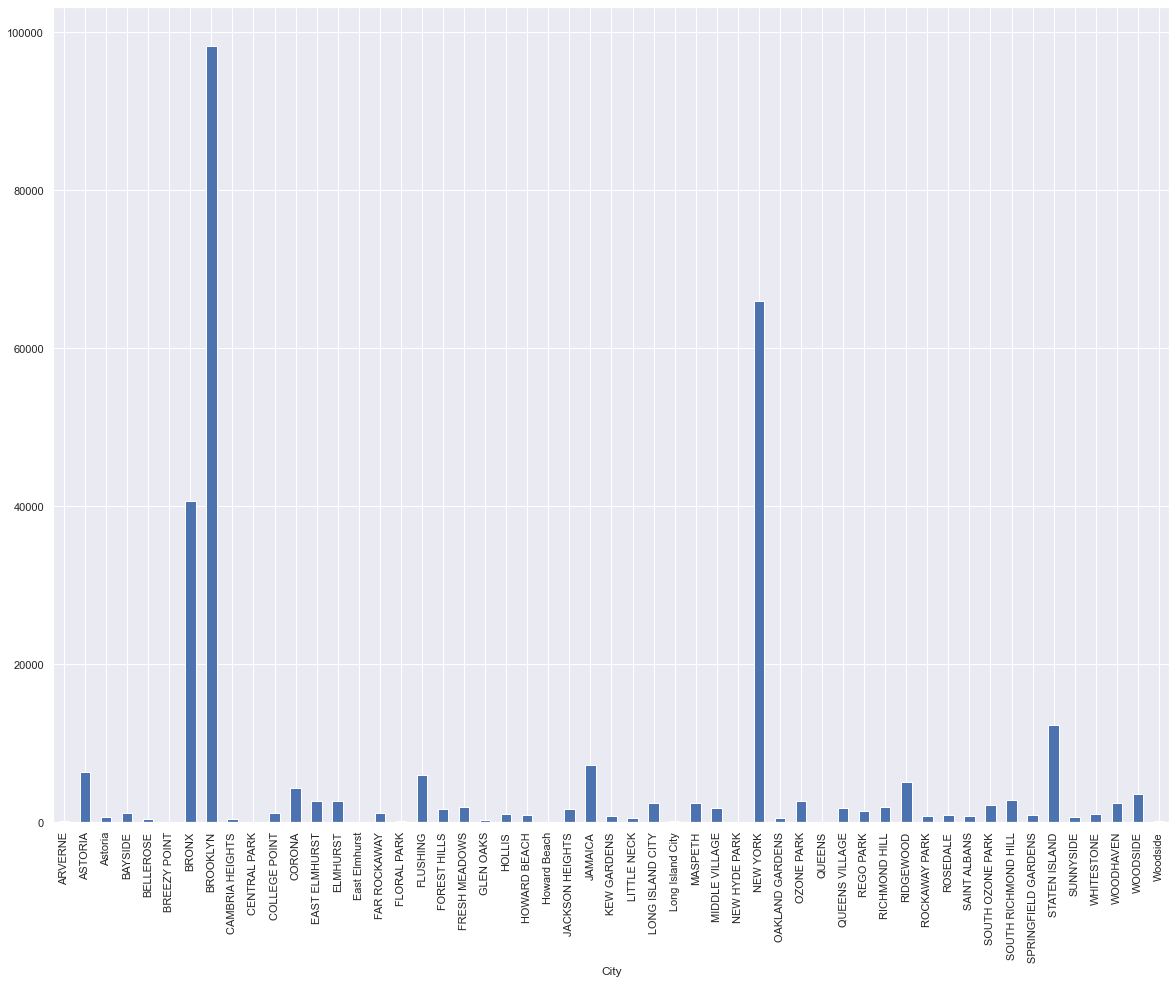

In [132]:
plt.figure(figsize=(20,15))
Total_report_city.plot(kind='bar')
plt.xticks(rotation=90)


We can see that the Majority Reports are from 3 cities, namely Bronx, Brooklyn and New York.

Other cities have relatively low reports except Staten Island.

## Task 4

In [133]:
new_data = data[['Created Date', 'Closed Date', 'City', 'Complaint Type']].copy()
new_data.head()

,Created Date,Closed Date,City,Complaint Type
0,2015-12-31 23:59:45,2016-01-01 00:55:00,NEW YORK,Noise - Street/Sidewalk
1,2015-12-31 23:59:44,2016-01-01 01:26:00,ASTORIA,Blocked Driveway
2,2015-12-31 23:59:29,2016-01-01 04:51:00,BRONX,Blocked Driveway
3,2015-12-31 23:57:46,2016-01-01 07:43:00,BRONX,Illegal Parking
4,2015-12-31 23:56:58,2016-01-01 03:24:00,ELMHURST,Illegal Parking


In [134]:
new_data.isnull().sum()

Created Date         0
Closed Date       2164
City              2614
Complaint Type       0
dtype: int64

In [135]:
new_data['City'] = new_data['City'].fillna('Unknown City')
new_data.dropna( inplace=True )
new_data.isnull().sum()

Created Date      0
Closed Date       0
City              0
Complaint Type    0
dtype: int64

In [136]:
new_data['Request_Closing_Time'] = new_data['Closed Date'] - new_data['Created Date']
new_data.head()

,Created Date,Closed Date,City,Complaint Type,Request_Closing_Time
0,2015-12-31 23:59:45,2016-01-01 00:55:00,NEW YORK,Noise - Street/Sidewalk,0 days 00:55:15
1,2015-12-31 23:59:44,2016-01-01 01:26:00,ASTORIA,Blocked Driveway,0 days 01:26:16
2,2015-12-31 23:59:29,2016-01-01 04:51:00,BRONX,Blocked Driveway,0 days 04:51:31
3,2015-12-31 23:57:46,2016-01-01 07:43:00,BRONX,Illegal Parking,0 days 07:45:14
4,2015-12-31 23:56:58,2016-01-01 03:24:00,ELMHURST,Illegal Parking,0 days 03:27:02


In [137]:
new_data['Closing_Time_Seconds'] = new_data['Request_Closing_Time'].apply(lambda x: x.seconds)
new_data.head()

,Created Date,Closed Date,City,Complaint Type,Request_Closing_Time,Closing_Time_Seconds
0,2015-12-31 23:59:45,2016-01-01 00:55:00,NEW YORK,Noise - Street/Sidewalk,0 days 00:55:15,3315
1,2015-12-31 23:59:44,2016-01-01 01:26:00,ASTORIA,Blocked Driveway,0 days 01:26:16,5176
2,2015-12-31 23:59:29,2016-01-01 04:51:00,BRONX,Blocked Driveway,0 days 04:51:31,17491
3,2015-12-31 23:57:46,2016-01-01 07:43:00,BRONX,Illegal Parking,0 days 07:45:14,27914
4,2015-12-31 23:56:58,2016-01-01 03:24:00,ELMHURST,Illegal Parking,0 days 03:27:02,12422


In [138]:
task_4_completed = (new_data.groupby(['Complaint Type', 'City']).mean()).sort_values(by='Closing_Time_Seconds')
task_4_completed.head()

,,Closing_Time_Seconds
Complaint Type,City,
Graffiti,ROSEDALE,563.0
Drinking,ARVERNE,859.0
Posting Advertisement,RIDGEWOOD,895.0
Bike/Roller/Skate Chronic,EAST ELMHURST,908.0
Illegal Fireworks,OZONE PARK,1140.0


So we grouped the location and Complaint type and ordered them by average of closing time.
We have the mean accuracy with precision till seconds.

## Task 5

Task 5:

We will perform ANOVA(Analysis of Variance) as the statistical test.

But first we will have to Stisfy the assumptions of ANOVA

1) The samples are independent.

2) Each sample is from a normally distributed population.

3) The population standard deviations of the groups are all equal. This property is known as homoscedasticity.

If these assumptions are not true for our dataset we may get a misleading p-value.


In [139]:
task_4 = new_data.groupby(['City', 'Complaint Type'])[['Closing_Time_Seconds']].mean().unstack()
task_4.columns = task_4.columns.droplevel()
task_4

Complaint Type,Agency Issues,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,NaN,7753.052632,NaN,NaN,9093.485714,10685.592593,12928.500000,859.000000,5520.000000,6533.250000,...,5623.909091,4620.000000,7172.620690,6695.571429,3720.000000,NaN,NaN,NaN,2491.000000,1740.000000
ASTORIA,NaN,18000.608000,NaN,6261.533333,17206.014897,26265.914530,10449.333333,17000.714286,29142.250000,17703.312500,...,7280.000000,10782.393443,12424.189119,12633.034314,4140.000000,21132.000000,NaN,19476.659574,16652.555556,17767.500000
Astoria,NaN,NaN,NaN,NaN,16947.836207,15250.166667,NaN,NaN,NaN,NaN,...,NaN,NaN,13367.631579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BAYSIDE,NaN,11788.243243,NaN,NaN,9227.058355,12095.207071,10703.000000,6840.000000,16385.666667,10352.000000,...,12725.500000,11781.250000,5511.600000,6150.312500,NaN,NaN,NaN,5497.000000,NaN,6760.500000
BELLEROSE,NaN,33466.000000,NaN,17640.000000,21806.305263,25886.213483,6660.000000,14105.000000,NaN,54480.000000,...,7909.000000,5091.000000,19353.307692,9299.400000,26940.000000,8136.000000,NaN,20731.857143,27149.000000,NaN
BREEZY POINT,NaN,9408.500000,NaN,NaN,4779.666667,25722.666667,NaN,9480.000000,NaN,NaN,...,NaN,NaN,3600.000000,4768.000000,NaN,NaN,NaN,NaN,NaN,NaN
BRONX,NaN,22316.755477,NaN,12452.300000,19297.439000,26756.971824,15258.269841,18559.021277,32036.555556,24342.259109,...,16414.367089,14861.308958,16802.922160,17347.476443,23885.210526,12463.176471,NaN,16508.366197,19404.372549,20241.110818
BROOKLYN,NaN,15375.969089,NaN,17238.558559,15160.535155,17774.122031,13741.861111,12073.645914,21638.325581,16498.084014,...,10797.379412,11286.349839,11412.709301,11570.009080,12012.795918,12099.422222,NaN,10888.024885,12766.941176,15797.875728
CAMBRIA HEIGHTS,NaN,9462.818182,NaN,NaN,21240.217687,25692.713043,NaN,NaN,NaN,47482.000000,...,9507.500000,NaN,16588.960000,20413.220779,NaN,NaN,NaN,16368.166667,NaN,NaN


In [140]:
#We will take the top ten Complaint types.
task_5 = task_4[data['Complaint Type'].value_counts().sort_values(ascending=False)[:10].index]


<AxesSubplot:xlabel='Complaint Type', ylabel='Complaint Type'>

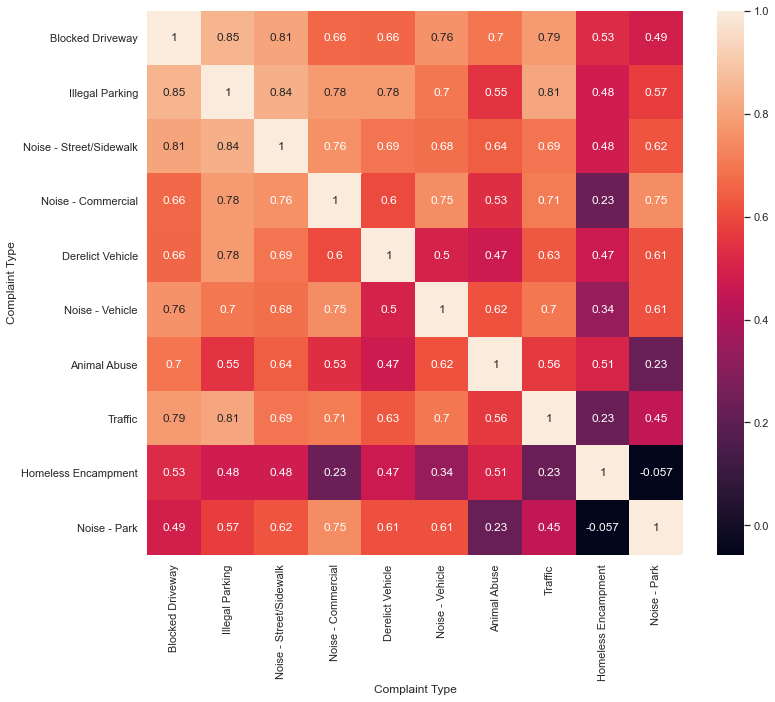

In [141]:
plt.figure(figsize=(12,10))
sns.heatmap(task_5.corr(), annot=True )

As we can see no features are highly correlated i.e >0.9, so we  satisfy the assumption of ANOVA

In [142]:
task_5.skew()

Complaint Type
Blocked Driveway           0.158954
Illegal Parking            0.341632
Noise - Street/Sidewalk    1.031579
Noise - Commercial         1.059723
Derelict Vehicle           0.075541
Noise - Vehicle            0.504516
Animal Abuse               1.540845
Traffic                    1.244876
Homeless Encampment        1.583575
Noise - Park               1.160662
dtype: float64

Anything more/less than 1/-1 is considered to be highly skewed, We will apply log function to minimize the skewness of our data.

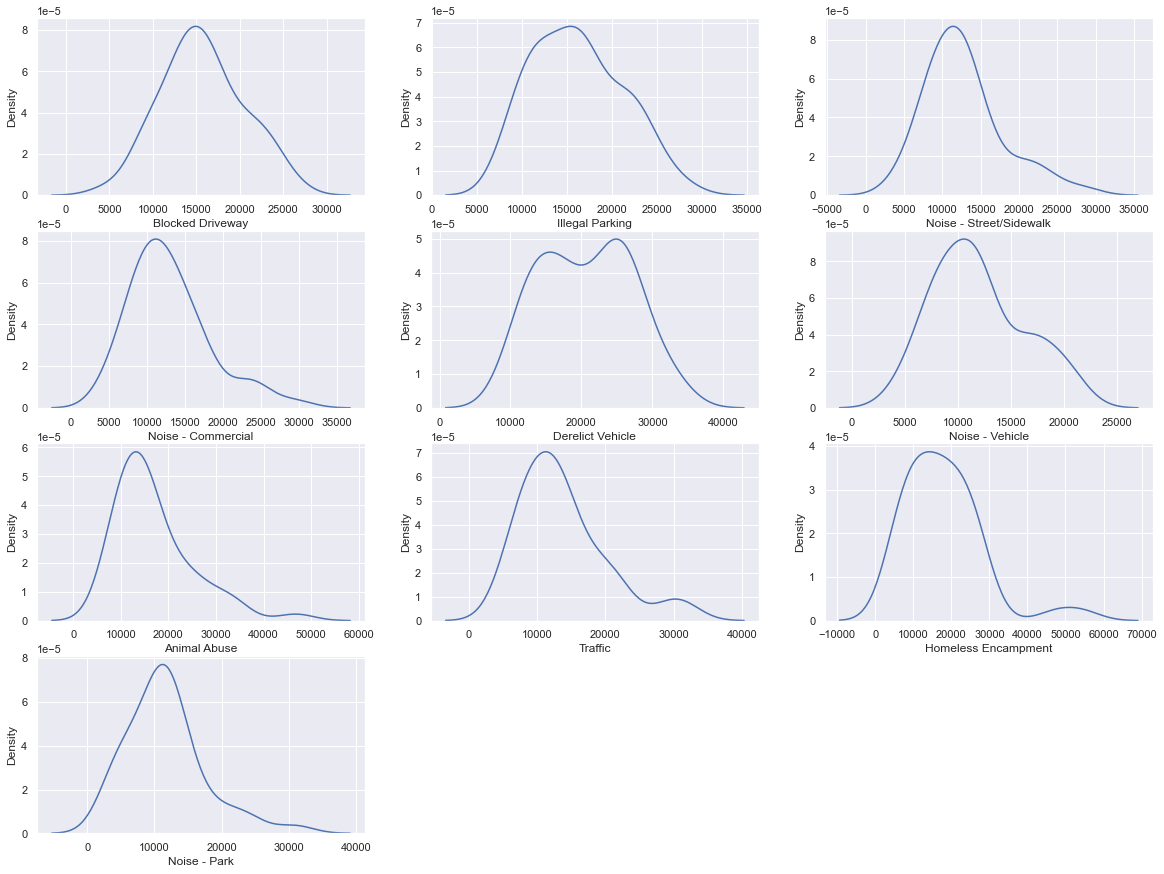

In [143]:
plt.figure(figsize=(20,15))
for index, col in enumerate(task_5.columns):
    plt.subplot(4 , 3 , index+1)
    sns.distplot(task_5[col], bins=20, hist=False, kde=True)

We can see the columns like Noise-park, Animal Abuse, Traffic, Homeless Encampment, Noise-Commercial and Noise-Street/Sidewalk are left skewed, we have to fix this.

In [144]:
task_5_log = np.log(task_5)
task_5_log.skew()

Complaint Type
Blocked Driveway          -0.849506
Illegal Parking           -0.179396
Noise - Street/Sidewalk   -0.255236
Noise - Commercial        -0.084314
Derelict Vehicle          -0.387497
Noise - Vehicle           -0.239890
Animal Abuse               0.454703
Traffic                    0.257582
Homeless Encampment       -0.113257
Noise - Park              -0.422257
dtype: float64

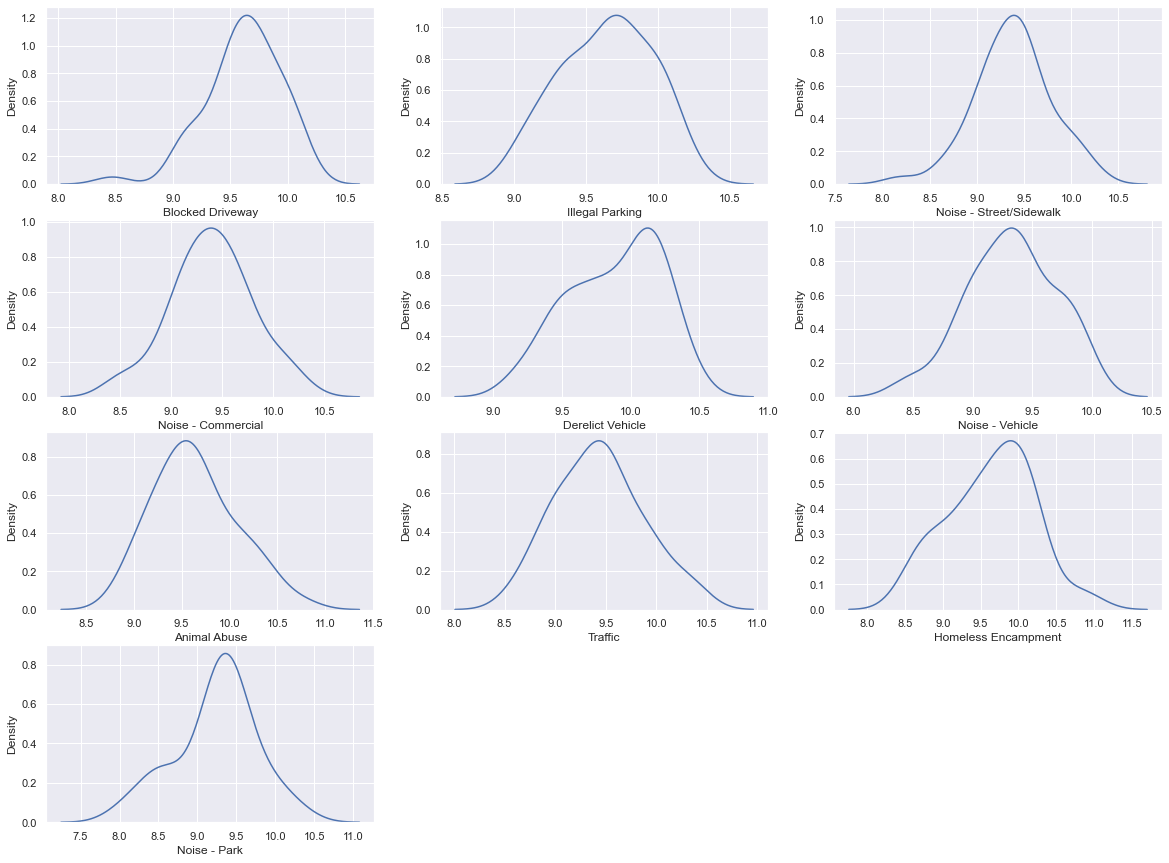

In [145]:
plt.figure(figsize=(20,15))
for index, col in enumerate(task_5_log.columns):
    plt.subplot(4 , 3 , index+1)
    sns.distplot(task_5_log[col], bins=20, hist=False, kde=True)

Definitely the shape of distribution of the skewed columns have changed, they are no longer highly skewed. We satisfy the second assumption of ANOVA

In [146]:
task_5_log.std()

Complaint Type
Blocked Driveway           0.328668
Illegal Parking            0.315440
Noise - Street/Sidewalk    0.400252
Noise - Commercial         0.400250
Derelict Vehicle           0.333838
Noise - Vehicle            0.368218
Animal Abuse               0.433653
Traffic                    0.428994
Homeless Encampment        0.563087
Noise - Park               0.521698
dtype: float64

Our standard deviations are similar and close to equal, hence we satisfy the assumption of homoscedasticity.

We have satisfied all the assumptions of ANOVA and can move forward with our test.

Null Hypothesis: Average response time for all complaint types is similar.

Alternate Hypothesis: Average response time for all complaint types is not similar.

In [147]:
stats, p =  f_oneway(task_5_log['Blocked Driveway'].dropna(), task_5_log['Illegal Parking'].dropna(),
                     task_5_log['Noise - Street/Sidewalk'].dropna(), task_5_log['Noise - Commercial'].dropna(),
                     task_5_log['Derelict Vehicle'].dropna(), task_5_log['Noise - Vehicle'].dropna(),
                     task_5_log['Animal Abuse'].dropna(), task_5_log['Traffic'].dropna(),
                     task_5_log['Homeless Encampment'].dropna(), task_5_log['Noise - Park'].dropna())

print("Stats: {:.2f},\np-value: {:.2f}".format(stats,p))

Stats: 11.03,
p-value: 0.00


Since our p-value is 0.00 we reject null hypothesis.

## Task 6

Null hypothesis: Complaint type is not Related to Location

Alternative hypothesis: Complaint type is related to location

we will use Spearmanr correlation for the test, correlation of more than 0.8 will overturn our null hypothesis.

In [148]:
task_6 = data[['Complaint Type','City', 'Longitude', 'Latitude']].copy()

In [149]:
task_6.dropna(inplace=True)

In [150]:
ord_enc = OrdinalEncoder()
task_6['Complaint Type'] = ord_enc.fit_transform(task_6[['Complaint Type']])
task_6['City'] = ord_enc.fit_transform(task_6[['City']])
task_6.head()

,Complaint Type,City,Longitude,Latitude
0,13.0,33.0,-73.923501,40.865682
1,2.0,1.0,-73.915094,40.775945
2,2.0,6.0,-73.888525,40.870325
3,9.0,6.0,-73.828379,40.835994
4,9.0,13.0,-73.874170,40.733060


In [151]:
stat, p = spearmanr(task_6)
print(p)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


As we can see all the p values are 0, that means there is no significant correlation between the features.

<AxesSubplot:>

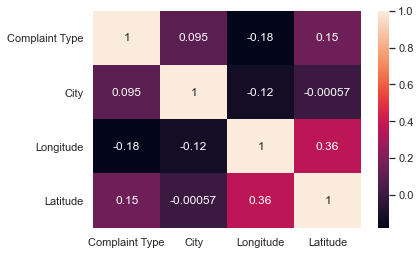

In [152]:
sns.heatmap(task_6.corr(), annot=True)

## End